To build a model that identifies if a tweet informs about a disaster using Naive Bayes, we need to follow these steps:

Data collection: We need to collect a dataset of tweets that inform about disasters and tweets that do not inform about disasters.

Data pre-processing: We need to clean and preprocess the data by removing stop words, special characters, and converting text to lowercase.

Feature extraction: We need to extract features from the preprocessed data. One way to do this is to use the Bag of Words model, which creates a vocabulary of unique words from the text and then counts the number of occurrences of each word in each tweet.

Train the Naive Bayes model: We will train the Naive Bayes model on the preprocessed and feature extracted data.

Evaluate the model: We will evaluate the performance of the Naive Bayes model using metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Data collection
import pandas as pd

# Load the dataset of tweets
file_path = "/content/drive/MyDrive/CS298/tweets.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
print(df.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [ ]:
#checking for count of null values
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0
1,keyword,61
2,location,2533
3,text,0
4,target,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

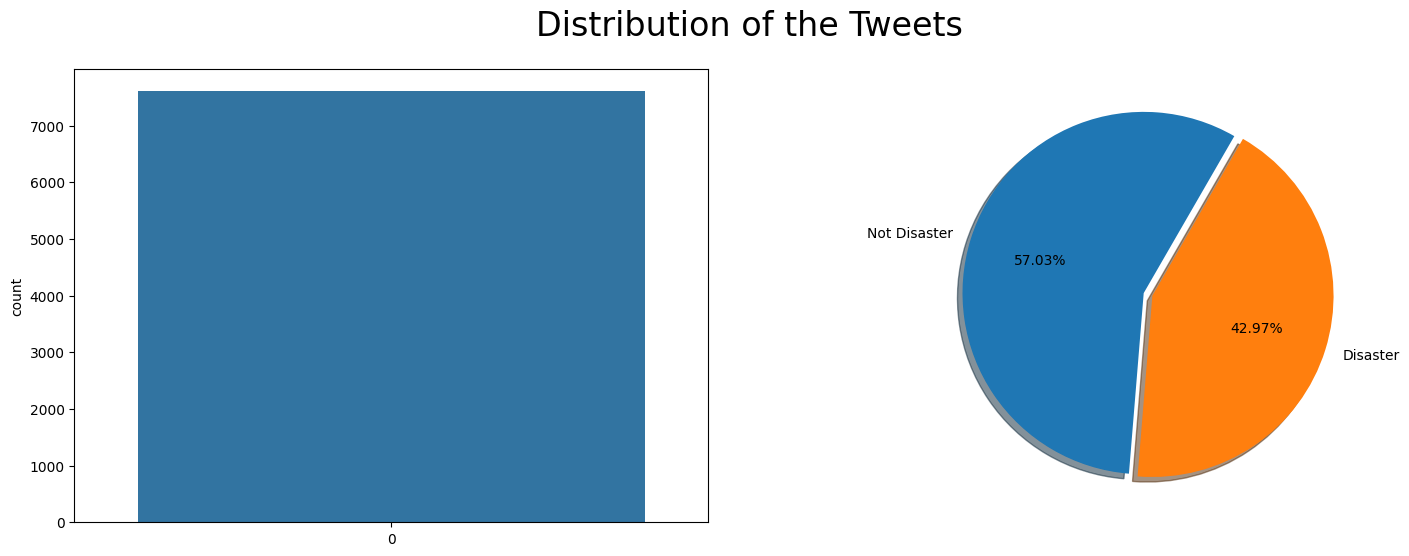

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(df['target'], ax=axes[0])
axes[1].pie(df['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

In [ ]:
# Step 2: Data pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download the stop words and stemmer from NLTK
nltk.download('stopwords')
stemmer = PorterStemmer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to clean and preprocess the text
def preprocess(text):
    # Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and stem the words
    words = [stemmer.stem(word) for word in tokens if word not in stopwords.words('english')]
    # Join the words back into a string
    return ' '.join(words)

In [ ]:
# Apply the preprocess function to the text column
df['text'] = df['text'].apply(preprocess)

In [ ]:
# Step 3: Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Create a bag of words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['target']

In [ ]:
# Step 4: Train the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target values for the test set
y_pred = nb.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.8063033486539725
Precision: 0.7911184210526315
Recall: 0.7411402157164869
F1 score: 0.7653142402545744
